In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "svg"

In [2]:
inf = pd.read_csv("../data/raw/cam-inflation-2005-2025.csv")

## Check Missing Values

In [3]:
print(inf.isna().sum())

Date                       0
CPI_all_item               0
MoM_Change_CPI_all_item    0
YoY_Change_CPI_all_item    0
Three_Month_Avg_YoY        0
Twelve_Month_Avg_YoY       0
dtype: int64


## Check for Duplicate Rows

In [4]:
print(inf.duplicated().sum())
inf = inf.drop(columns=['MoM_Change_CPI_all_item', 'YoY_Change_CPI_all_item', 'Three_Month_Avg_YoY', 'Twelve_Month_Avg_YoY'])

0


## Check for Outliers

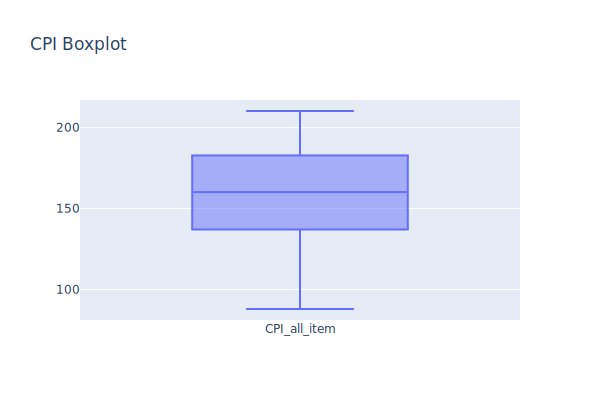

In [5]:
fig = go.Figure()

numeric_cols = inf.select_dtypes(include=[np.number]).columns

for col_name in numeric_cols:
    fig.add_trace(go.Box(y=inf[col_name], name=col_name))

fig.update_layout(
    height=400,
    width=600,
    title_text="CPI Boxplot"
)

fig.show()

## EDA

In [7]:
inf['Date'] = pd.to_datetime(inf['Date'], dayfirst=True)
inf.head()

,Date,CPI_all_item
0,2005-01-22,87.98
1,2005-02-22,88.39
2,2005-03-22,88.63
3,2005-04-22,90.26
4,2005-05-22,91.01


In [8]:
cpi_df = inf[['Date', 'CPI_all_item']].copy()
cpi_df = cpi_df.sort_values('Date')
cpi_df.head()

,Date,CPI_all_item
0,2005-01-22,87.98
1,2005-02-22,88.39
2,2005-03-22,88.63
3,2005-04-22,90.26
4,2005-05-22,91.01


## Plot Data over Time

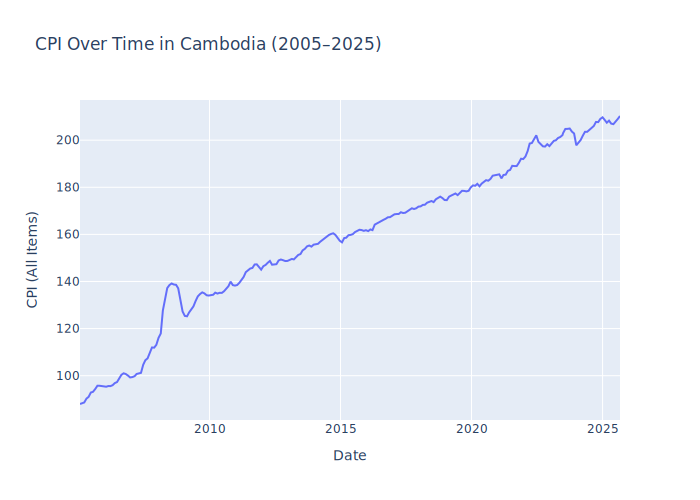

In [ ]:
fig = px.line(
    cpi_df,
    x='Date',
    y='CPI_all_item',
    title='CPI Over Time in Cambodia (2005–2025)',
    labels={'CPI_all_item': 'CPI (All Items)', 'Date': 'Date'}
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='CPI (All Items)',
    hovermode='x unified'
)

fig.show()

## Check Seasonality

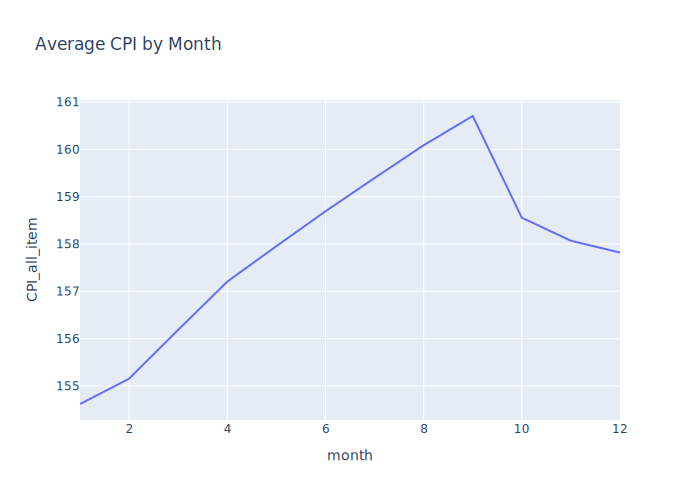

In [10]:
cpi_df['month'] = cpi_df['Date'].dt.month
monthly = cpi_df.groupby('month')['CPI_all_item'].mean().reset_index()
fig = px.line(monthly, x='month', y='CPI_all_item', title='Average CPI by Month')
fig.show()


## Check Growth Pattern

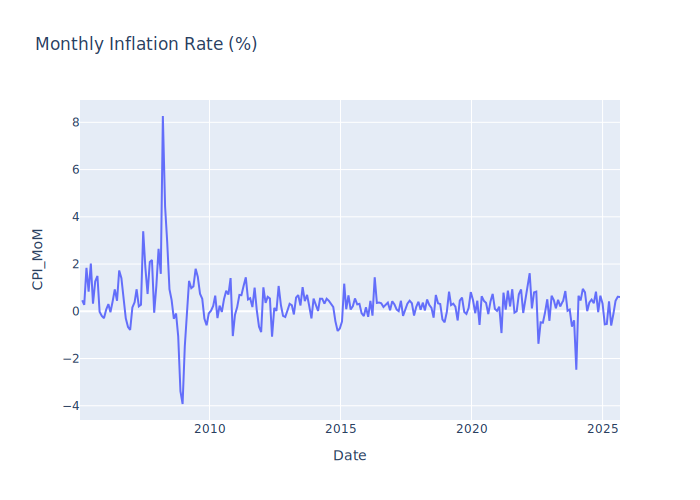

In [ ]:
cpi_df['CPI_MoM'] = cpi_df['CPI_all_item'].pct_change() * 100
fig = px.line(cpi_df, x='Date', y='CPI_MoM', title='Monthly Inflation Rate (%)')
fig.show()